## How do I create plots in Pandas?
https://web.archive.org/web/20240302132558id_/https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html

In [1]:
;; pip install pandas matplotlib
(import [pandas :as pd]
        [matplotlib.pyplot :as plt])
nil

In [2]:
(def air-quality (pd/read_csv "https://web.archive.org/web/20240429180538id_/https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv"
                              **
                              :index-col 0
                              :parse-dates true))

#'user/air-quality

<Axes: xlabel='datetime'>

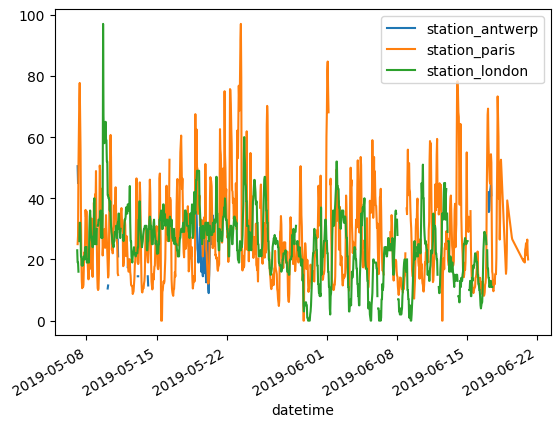

In [3]:
(.plot air-quality)

<Axes: xlabel='datetime'>

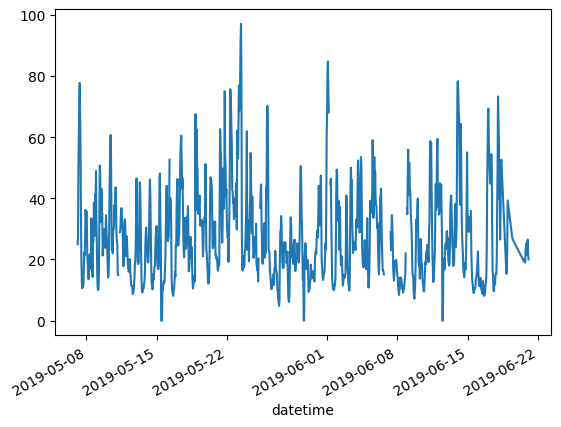

In [4]:
(.plot (aget air-quality "station_paris"))

<Axes: xlabel='station_london', ylabel='station_paris'>

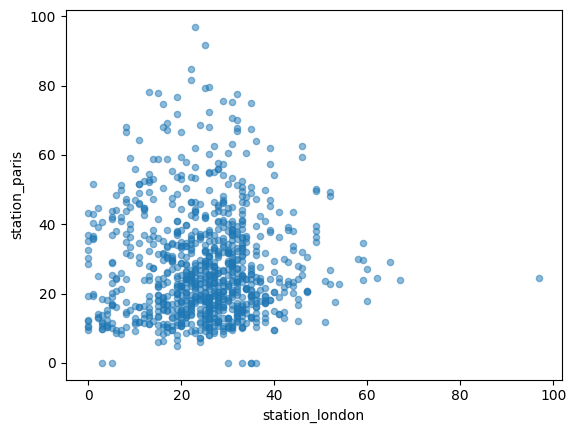

In [5]:
(-> air-quality .-plot (.scatter
                        **
                        :x "station_london" 
                        :y "station_paris"
                        :alpha 0.5))

In [6]:
(require '[clojure.string :as str])
(filter #(not (str/starts-with? % "_")) 
        (dir (.-plot air-quality)))

("area" "bar" "barh" "box" "density" "hexbin" "hist" "kde" "line" "pie" "scatter")

<Axes: >

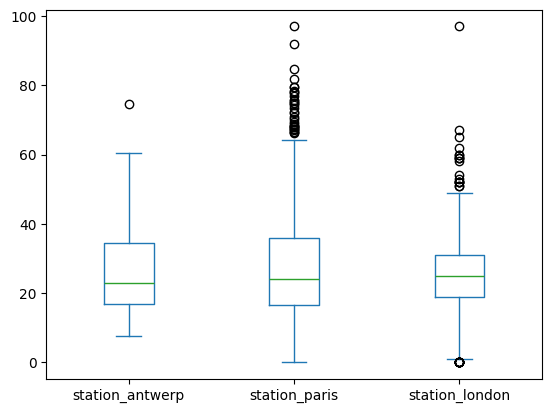

In [7]:
(-> air-quality .-plot (.box))

#'user/axs

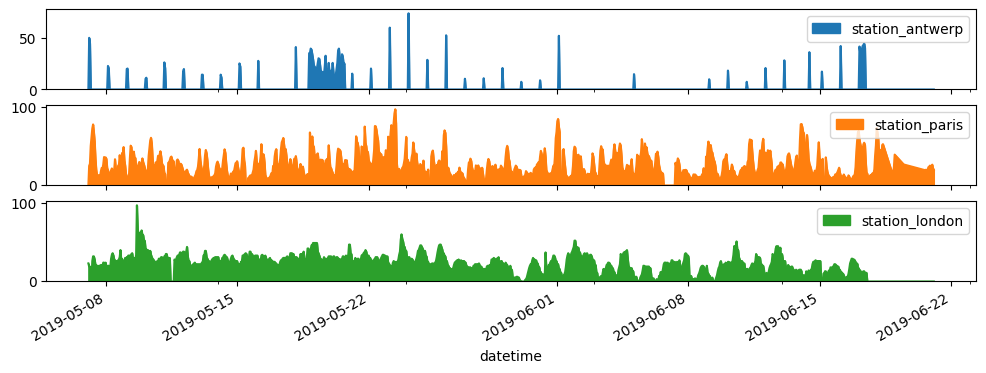

In [8]:
(def axs (-> air-quality .-plot (.area ** :figsize #py (12 4) :subplots true)))

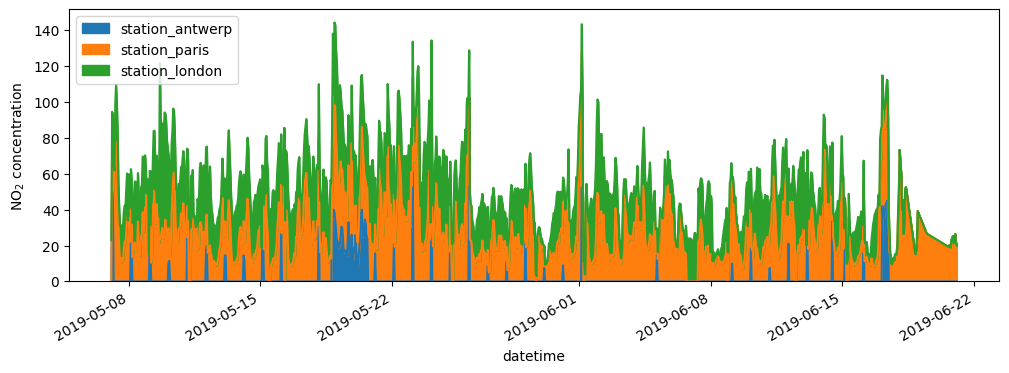

In [9]:
(let [[fig axs] (plt/subplots ** :figsize #py (12 4))]  ;; Create an empty Matplotlib Figure and Axes
    (-> air-quality .-plot (.area ** :ax axs))          ;; Use pandas to put the area plot on the prepared Figure/Axe
    (.set-ylabel axs "NO$_2$ concentration")            ;; Do any Matplotlib customization you like
    (.savefig fig "no2_concentrations.png")             ;; Save the Figure/Axes using the existing Matplotlib method.
    (plt/show))                                         ;; Display the plot
